# Contents:
01. Importing libraries and data
    - Importing libraries
    - Importing data
02. Addressing PII (Personally Identifiable Information) data
03. Comparing customer behavior in different geographic area
    - Create a regional segmentation
    - Examine the differences
04. Creating a flag for activity of customers
05. Creating customer profiles and examining them from different aspects
    - Profiling based on age
    - Profiling based on income
    - Profiling based on family status and number of dependents

# 01. Importing libraries and data

## Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Importing data

In [2]:
# Defining the folder path
path = r'/Users/yusufsalk/Documents/Instacart Basket Analysis'

In [3]:
path

'/Users/yusufsalk/Documents/Instacart Basket Analysis'

In [4]:
# Importing data
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merged.pkl'))

In [5]:
# Check the output
df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [6]:
df_merged.shape

(32404859, 33)

# 02. Addressing PII (Personally Identifiable Information) data

"first_name" and "last_name" columns are considered as a PII data. Therefore, we should remove these columns to make sure there is no personal information in the data.

In [7]:
# Remove related columns
df_merged.drop(['first_name', 'last_name'], axis=1, inplace = True)

In [8]:
# Check the output
df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,median_of_days,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


In [9]:
# Export the dataframe
df_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'project_data.pkl'))

# 03. Comparing customer behavior in different geographic area

## Create a regional segmentation

In [10]:
# Creating a region columns based on the 'state' column

result = []

for value in df_merged['state']:
    if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
        result.append("Northeast")
    elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        result.append("Midwest")
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        result.append("South")
    else:
        result.append("West")

In [11]:
# Adding results to the dataframe in a new column
df_merged['region'] = result

In [12]:
# Check the output
df_merged[['state', 'region']].head()

,state,region
0,Alabama,South
1,Alabama,South
2,Alabama,South
3,Alabama,South
4,Alabama,South


In [13]:
# Check the frequency
df_merged['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

## Examine the differences

In [14]:
# Creating a crosstab between region and spending_flag
region_spending = pd.crosstab(df_merged['region'], df_merged['spending_flag'], dropna = False)

In [15]:
# Copy the table to clipboard
region_spending.to_clipboard()

In [16]:
# Check the output
region_spending

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


# 04. Creating a flag for activity of customers

In [17]:
# Creating a flag that assigns a “activity” label to a user ID based on its corresponding max order value
df_merged.loc[df_merged['max_order'] >= 5, 'activity_flag'] = 'High-activity customer'
df_merged.loc[df_merged['max_order'] < 5, 'activity_flag'] = 'Low-activity customer'

In [19]:
# Check the output
df_merged[['user_id', 'activity_flag', 'max_order']].head()

,user_id,activity_flag,max_order
0,1,High-activity customer,10
1,1,High-activity customer,10
2,1,High-activity customer,10
3,1,High-activity customer,10
4,1,High-activity customer,10


In [20]:
# Check the frequency
df_merged['activity_flag'].value_counts(dropna = False)

High-activity customer    30964564
Low-activity customer      1440295
Name: activity_flag, dtype: int64

In [21]:
# Creating a subset of high-activity customer
df_high = df_merged[df_merged['activity_flag'] == 'High-activity customer']

In [22]:
# Export the subset
df_high.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customer.pkl'))

# 05. Creating customer profiles and examining them from different aspects

## Profiling based on age

In [23]:
# Creating a flag for age groups
df_merged.loc[df_merged['age'] <= 25 , 'age_flag'] = 'Young adult'
df_merged.loc[(df_merged['age'] > 25) & (df_merged['age'] <= 44), 'age_flag'] = 'Adult'
df_merged.loc[(df_merged['age'] > 44) & (df_merged['age'] <= 64), 'age_flag'] = 'Middle-age'
df_merged.loc[df_merged['age'] >= 65 , 'age_flag'] = 'Old age'

In [27]:
# Check the frequency
df_merged['age_flag'].value_counts(dropna = False)

Middle-age     10139691
Adult           9644895
Old age         8575084
Young adult     4045189
Name: age_flag, dtype: int64

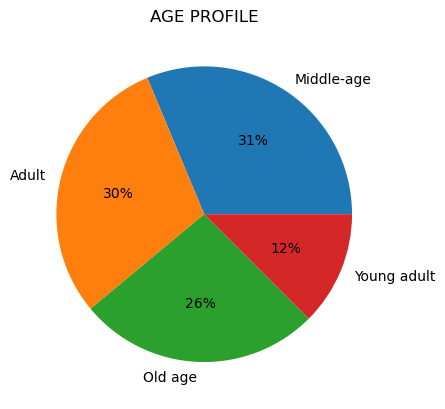

In [28]:
# Creating a pie chart
age_profile = df_merged['age_flag'].value_counts().plot.pie(title = 'AGE PROFILE', label = '', autopct = ('%1.f%%'))

In [29]:
# Export the chart
age_profile.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_profile.png'))

In [30]:
# Summary statistics based on age group
age_stats = df_merged.groupby(['age_flag']).agg({'days_since_last_order':['min', 'max', 'mean'], 'prices':['sum', 'max', 'mean']})

In [31]:
age_stats

days_since_last_order                       prices                
                              min   max       mean         sum   max      mean
age_flag                                                                      
Adult                         0.0  30.0  11.113359  75123970.1  25.0  7.790142
Middle-age                    0.0  30.0  11.121171  78966964.2  25.0  7.789202
Old age                       0.0  30.0  11.078641  66845644.8  25.0  7.796546
Young adult                   0.0  30.0  11.093030  31489541.5  25.0  7.785748

There are approximately 11 days between customer orders from all age groups.

In [32]:
# Creating a crosstab between region and age
region_age = pd.crosstab(df_merged['region'], df_merged['age_flag'], normalize = 'index', dropna = False)

In [33]:
# Check the output
region_age

age_flag,Adult,Middle-age,Old age,Young adult
region,,,,
Midwest,0.299417,0.314871,0.262045,0.123666
Northeast,0.293366,0.310842,0.271531,0.124261
South,0.299936,0.309686,0.262814,0.127565
West,0.295964,0.316723,0.264573,0.122741


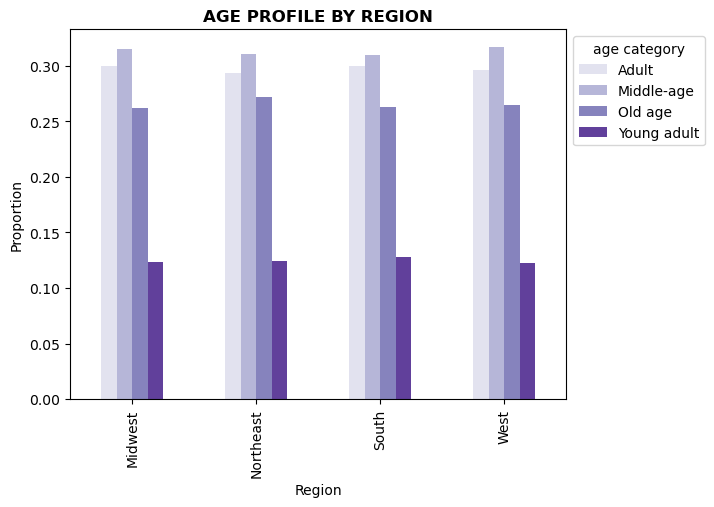

In [34]:
# Creating a bar chart
region_age_bar = region_age.plot.bar(color = sns.color_palette('Purples', 4))
plt.title('AGE PROFILE BY REGION', fontweight = 'bold')
plt.xlabel('Region')
plt.ylabel('Proportion')
plt.legend(title ='age category', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [35]:
# Export the chart
region_age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_age.png'))

In [36]:
# Import the department dataset
df_dept = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [37]:
# Check the output
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [38]:
# Changing column name
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [39]:
# Check the result
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [40]:
# Remove the existing merge column
df_merged = df_merged.drop(columns = ['_merge'])

In [41]:
# Check the output
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   order_id               int64  
 1   user_id                int64  
 2   order_number           int64  
 3   orders_day_of_week     int64  
 4   order_hour_of_day      int64  
 5   days_since_last_order  float64
 6   product_id             int64  
 7   add_to_cart_order      int64  
 8   reordered              int64  
 9   product_name           object 
 10  aisle_id               int64  
 11  department_id          int64  
 12  prices                 float64
 13  price_range_loc        object 
 14  busiest_day            object 
 15  busiest_days           object 
 16  busiest_period_of_day  object 
 17  max_order              int64  
 18  loyalty_flag           object 
 19  mean_price             float64
 20  spending_flag          object 
 21  median_of_days         float64
 22  frequency_flag  

In [42]:
# Merge data sets on department_id
df = df_merged.merge(df_dept, on = 'department_id', how = 'left')

In [43]:
# Check the result
df[['department']].value_counts( dropna = False)

department     
produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
dtype: int64

In [44]:
# Creating a crosstab between department and age
department_age = pd.crosstab(df['department'], df['age_flag'], dropna = False)

In [45]:
# Check the output
department_age

age_flag,Adult,Middle-age,Old age,Young adult
department,,,,
alcohol,44890,49359,39036,20411
babies,127238,134108,109445,53011
bakery,349788,366692,309522,146426
beverages,789244,850960,714832,333087
breakfast,208477,221198,183844,89514
bulk,10271,10638,9242,4422
canned goods,319096,333034,282438,133490
dairy eggs,1615921,1681753,1426213,674860
deli,313917,329214,277618,130500


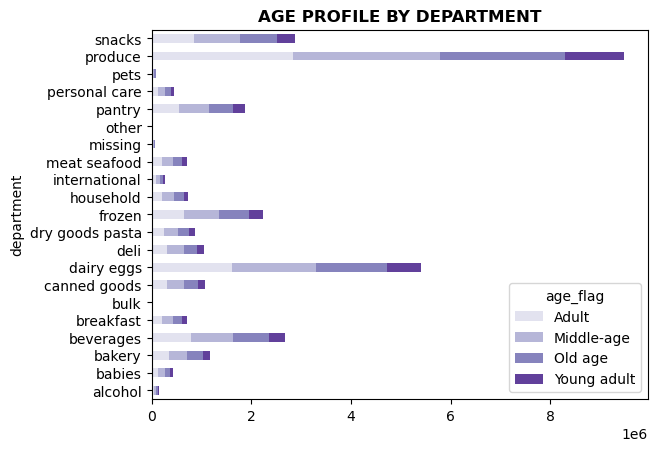

In [46]:
# Creating a stacked bar chart 
dept_age = department_age.plot.barh(stacked = True, color = sns.color_palette('Purples', 4))
plt.title('AGE PROFILE BY DEPARTMENT', fontweight = 'bold')
plt.show()

Produce, dairy eggs and snacks are the top departments across all four age groups, respectively.

In [47]:
# Export the chart
dept_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_age.png'))

## Profiling based on income

In [48]:
# Creating a flag for income
df.loc[df['income'] <= 50000, 'income_flag'] = 'Low income'
df.loc[(df['income'] > 50000) & (df['income'] <= 150000), 'income_flag'] = 'Middle income'
df.loc[df['income'] > 150000, 'income_flag'] = 'High income'

In [51]:
# Check the frequency
df['income_flag'].value_counts( dropna = False)

Middle income    24759936
High income       4050840
Low income        3594083
Name: income_flag, dtype: int64

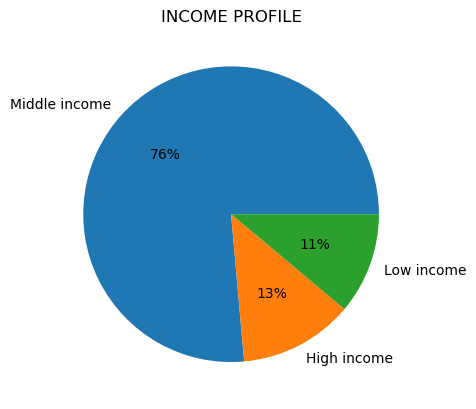

In [52]:
# Creating a pie chart
income_profile = df['income_flag'].value_counts().plot.pie(title = 'INCOME PROFILE', label = '', autopct = ('%1.f%%'))

In [53]:
# Export the chart
income_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_profile.png'))

In [54]:
# Summary statistics based on income
income_stats = df.groupby(['income_flag']).agg({'days_since_last_order':['min', 'max', 'mean'], 'prices':['sum', 'max', 'mean']})

In [55]:
income_stats

days_since_last_order                        prices        \
                                min   max       mean          sum   max   
income_flag                                                               
High income                     0.0  30.0  10.941399   32161392.7  25.0   
Low income                      0.0  30.0  11.587220   24069521.7  25.0   
Middle income                   0.0  30.0  11.061343  196195206.2  25.0   

                         
                   mean  
income_flag              
High income    7.947022  
Low income     6.696985  
Middle income  7.924302

Instacart generated about 77% of its revenue from the middle income group.

In [56]:
# Creating a crosstab between region and income
region_income = pd.crosstab(df['region'], df['income_flag'], normalize = 'index', dropna = False)

In [57]:
# Check the output
region_income

income_flag,High income,Low income,Middle income
region,,,
Midwest,0.125757,0.110354,0.763889
Northeast,0.123497,0.109608,0.766896
South,0.124358,0.112998,0.762644
West,0.126208,0.109608,0.764184


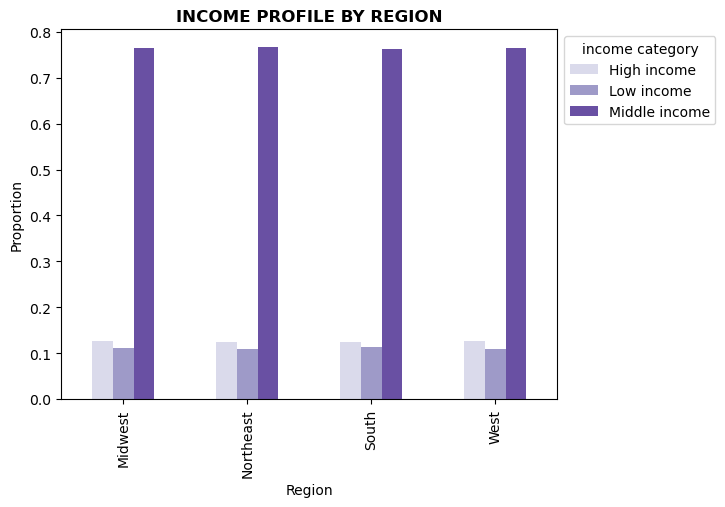

In [58]:
# Creating a bar chart
region_income_bar = region_income.plot.bar(color = sns.color_palette('Purples', 3))
plt.title('INCOME PROFILE BY REGION', fontweight = 'bold')
plt.xlabel('Region')
plt.ylabel('Proportion')
plt.legend(title ='income category', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [59]:
# Export the chart
region_income_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_income.png'))

In [60]:
# Creating a crosstab between department and income
department_income = pd.crosstab(df['department'], df['income_flag'], dropna = False)

In [61]:
# Check the output
department_income

income_flag,High income,Low income,Middle income
department,,,
alcohol,24953,19808,108935
babies,54433,30858,338511
bakery,154040,114709,903679
beverages,325093,405505,1957525
breakfast,86853,97368,518812
bulk,3773,4889,25911
canned goods,138733,86652,842673
dairy eggs,684241,535079,4179427
deli,130995,114096,806158


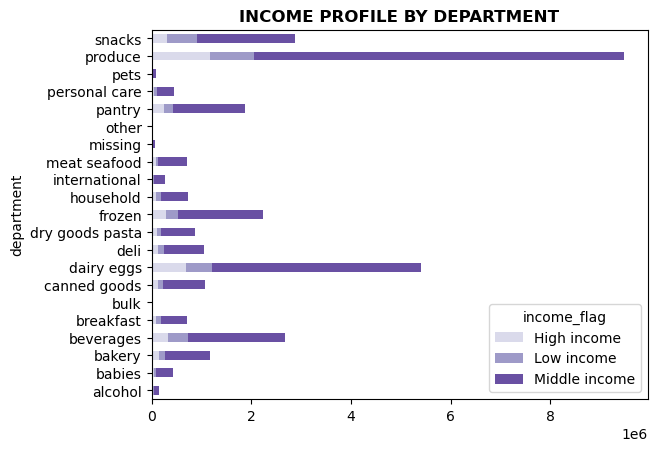

In [62]:
# Creating a stacked bar chart 
dept_income = department_income.plot.barh(stacked = True, color = sns.color_palette('Purples', 3))
plt.title('INCOME PROFILE BY DEPARTMENT', fontweight = 'bold')
plt.show()

Produce, dairy eggs and snacks are in the top three places among all income groups.

In [63]:
# Export the chart
dept_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_income.png'))

## Profiling based on family status and number of dependents

In [64]:
df['fam_status'].unique()

array(['married', 'divorced/widowed', 'single',
       'living with parents and siblings'], dtype=object)

In [65]:
# Creating a flag for family status and number of dependents
df.loc[(df['fam_status'] == 'married') & (df['n_dependants'] == 1), 'fam_depent_flag'] = 'Married with no dependents'
df.loc[(df['fam_status'] == 'married') & (df['n_dependants'] > 1), 'fam_depent_flag'] = 'Married with dependents'
df.loc[(df['fam_status'] != 'married') & (df['n_dependants'] == 0), 'fam_depent_flag'] = 'Single with no dependents'
df.loc[(df['fam_status'] != 'married') & (df['n_dependants'] > 0), 'fam_depent_flag'] = 'Single with dependents'

In [69]:
# Check the frequency
df['fam_depent_flag'].value_counts( dropna = False)

Married with dependents       15205849
Single with no dependents      8097503
Married with no dependents     7550904
Single with dependents         1550603
Name: fam_depent_flag, dtype: int64

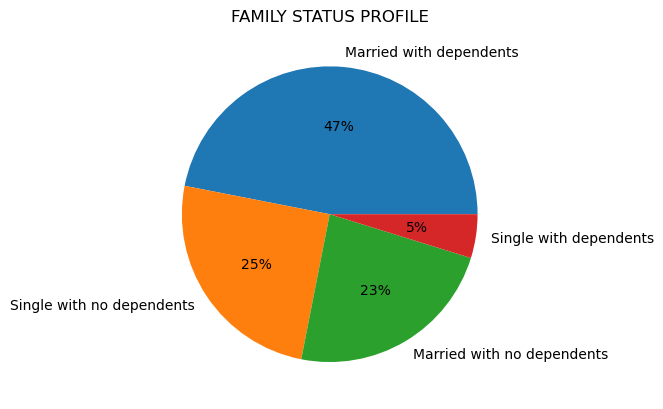

In [70]:
# Creating a pie chart
family_profile = df['fam_depent_flag'].value_counts().plot.pie(title = 'FAMILY STATUS PROFILE', label = '', autopct = ('%1.f%%'))

In [71]:
# Export the chart
family_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_profile.png'))

In [72]:
# Summary statistics based on family status
family_stats = df.groupby(['fam_depent_flag']).agg({'days_since_last_order':['min', 'max', 'mean'], 'prices':['sum', 'max', 'mean']})

In [73]:
family_stats

days_since_last_order                   \
                                             min   max       mean   
fam_depent_flag                                                     
Married with dependents                      0.0  30.0  11.117681   
Married with no dependents                   0.0  30.0  11.113141   
Single with dependents                       0.0  30.0  11.048170   
Single with no dependents                    0.0  30.0  11.080805   

                                 prices                  
                                    sum   max      mean  
fam_depent_flag                                          
Married with dependents     118406431.8  25.0  7.788203  
Married with no dependents   58855673.1  25.0  7.795712  
Single with dependents       12094239.6  25.0  7.800712  
Single with no dependents    63069776.1  25.0  7.789975

Majority of the revenue came from "Married with dependents" group.

In [74]:
# Creating a crosstab between region and family status
region_family = pd.crosstab(df['region'], df['fam_depent_flag'], normalize = 'index', dropna = False)

In [75]:
# Check the output
region_family

fam_depent_flag,Married with dependents,Married with no dependents,Single with dependents,Single with no dependents
region,,,,
Midwest,0.464053,0.236932,0.048243,0.250772
Northeast,0.469197,0.236116,0.046851,0.247836
South,0.470703,0.229883,0.049072,0.250342
West,0.472141,0.231373,0.046593,0.249893


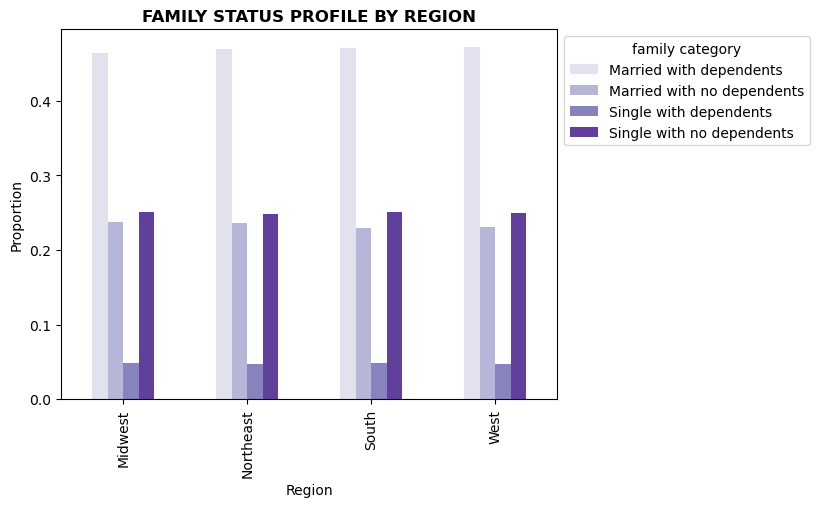

In [76]:
# Creating a bar chart
region_family_bar = region_family.plot.bar(color = sns.color_palette('Purples', 4))
plt.title('FAMILY STATUS PROFILE BY REGION', fontweight = 'bold')
plt.xlabel('Region')
plt.ylabel('Proportion')
plt.legend(title ='family category', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [77]:
# Export the chart
region_family_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_family.png'))

In [78]:
# Creating a crosstab between department and income
department_family = pd.crosstab(df['department'], df['fam_depent_flag'], dropna = False)

In [79]:
# Check the output
department_family

fam_depent_flag,Married with dependents,Married with no dependents,Single with dependents,Single with no dependents
department,,,,
alcohol,70386,35296,8896,39118
babies,201243,95919,20146,106494
bakery,547859,274022,56142,294405
beverages,1263508,625544,124629,674442
breakfast,328294,165431,34731,174577
bulk,16263,8358,1674,8278
canned goods,502661,249369,51190,264838
dairy eggs,2525060,1263538,260787,1349362
deli,492971,242718,50415,265145


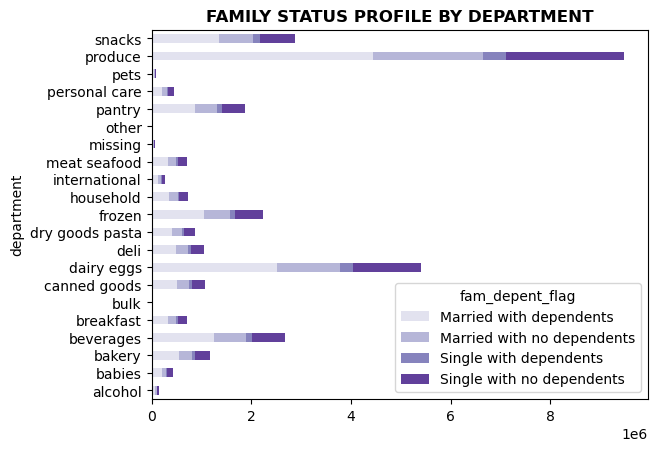

In [80]:
# Creating a stacked bar chart 
dept_family = department_family.plot.barh(stacked = True, color = sns.color_palette('Purples', 4))
plt.title('FAMILY STATUS PROFILE BY DEPARTMENT', fontweight = 'bold')
plt.show()

Produce, dairy eggs and snacks are the top three products across all family profiles.

In [81]:
# Export the chart
dept_family.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'depertmant_family.png'))

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 36 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   order_id               int64  
 1   user_id                int64  
 2   order_number           int64  
 3   orders_day_of_week     int64  
 4   order_hour_of_day      int64  
 5   days_since_last_order  float64
 6   product_id             int64  
 7   add_to_cart_order      int64  
 8   reordered              int64  
 9   product_name           object 
 10  aisle_id               int64  
 11  department_id          int64  
 12  prices                 float64
 13  price_range_loc        object 
 14  busiest_day            object 
 15  busiest_days           object 
 16  busiest_period_of_day  object 
 17  max_order              int64  
 18  loyalty_flag           object 
 19  mean_price             float64
 20  spending_flag          object 
 21  median_of_days         float64
 22  frequency_flag  

In [83]:
# Export the dataframe
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_data.pkl'))